## init

load test data (if not loaded from outside)

In [1]:
# check if IS_MASTER exists, this variable will only exist if it's being called by MASTER notebook.
# if it does not exist, set it to False



try: use_MASTER
except: use_MASTER = False

if not use_MASTER:
    #%run imports.ipynb
    from pathlib import Path
    import pickle,os,sys
    home = str(Path.home())
    
    #add the path were the functions are and load the small dataset (used for testing) and config data
    sys.path.append(f'{home}/Desktop/breast_cancer_PHD_research/functions/')
    with open(f'{home}/Dropbox/CyTOF_Breast/data_yishai/default_data.p', 'rb') as f:
      [df,config] = pickle.load(f)
    del f, home
    

# config['show'] = False


import needed packages

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
import numpy as np
# remove avx warning:
# I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
# To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

from pandas import DataFrame,Series





define classification class

In [3]:



from classes import *
from usefull_functions_new import random_list
from xg_shap import *
from plot_functions_new import class_colors
classification = Classification(**config)#build class (either from MASTER or from here) using parent class containg the config data

if not use_MASTER:
    
    classification.get_attribute()#print all attributes (config info)      
        

The directory already exists!
j         : b2345a_reduced
feautures_ind: 2
data_folder: Data_
visualize : True
plotUMAP  : True
show      : True
saveSVG   : False
recalculate_umap: True
recalculate_db: True
create_adjusted: False
compare   : False
isSingleSample: False
home      : /Users/yishai
dir_data  : /Users/yishai/Dropbox/CyTOF_Breast/data_yishai/Data_/
dir_index : /Users/yishai/Dropbox/CyTOF_Breast/data_yishai/indexes/
dir_plots : /Users/yishai/Dropbox/CyTOF_Breast/data_yishai//plots/_sample_b2345a_28022024_Data_/
dir_functions: /Users/yishai/Desktop/breast_cancer_PHD_research/functions/
save_add  : /Users/yishai/Dropbox/CyTOF_Breast/data_yishai/
name      : CellIden+EpiCols
title     : sampb2345a_reduced CellIden+EpiCols Based 
figname   : sampb2345a_reduced_CellIden+EpiCols_Based_
features  : ['K5', 'EpCam', 'aSMA', 'Vimentin', 'ER', 'CD49f', 'CD24', 'GATA3', 'CD44', 'K8-18', 'Ki67', 'ECad', 'panKeratin', 'H3K27me2', 'H3K36me2', 'H3K4me1', 'H3K9me2', 'H4K16ac', 'H2Aub', 'H3K64a

get labels for classification

In [4]:
if not use_MASTER:
    samples = Series(df['samp'])
    # .strdrop_duplicates()
    labels = Series(np.random.randint(-1,5,df.shape[0]),index = df.index)#random labels for testing
    
    # the labels of each single sample clustering
    sample_labels = Series(np.random.randint(-1,5,df.shape[0]),index = df.index)#random labels for testing
    sample_labels.loc[0],samples.loc[0]=-99,4.0#add error to test error handling


In [5]:

if not use_MASTER:

    # labels_to_classes_dict = classification.classes_dict(f"{classification.dir_data}_clusters_temp.csv")
    # classes = classification.get_classes(samples,sample_labels,labels_to_classes_dict)
    # # print(classes)
    # ind = classes.copy()[classes!='noise'][classes!='unknown'][classes!='classification_error'].index
    
    
    labels_to_classes_dict = classification.classes_dict(f"{classification.dir_data}_clusters.csv")
    classes = classification.get_classes(samples,sample_labels,labels_to_classes_dict)
    # print(classes)
    del labels_to_classes_dict
    print (f'unique classes: {sorted(classes.unique())}')

    print ('classification - done')



error in sample 4.0 and label -99
unique classes: ['Basal-like', 'Cycling', 'Luminal', 'Noise', 'Unknown', 'classification_error']
classification - done


In [6]:
print(classification.dir_data)

if isfile(classification.dir_data + f'classes_{classification.figname}.p') : 
    classes = classification.pickle_load(f'classes_{classification.figname}', classification.dir_data)
    # loaded as pd series
else: #either we want to calculate classes again or the file does not exist
    labels_to_classes_dict = classification.classes_dict(f"{classification.dir_data}_clusters.csv")
    classes = classification.get_classes(samples,sample_labels,labels_to_classes_dict)
    # print(classes)
    classification.pickle_dump(f'classes_{classification.figname}', classes, classification.dir_data)
print (f'unique classes: {sorted(classes.unique())}')


/Users/yishai/Dropbox/CyTOF_Breast/data_yishai/Data_/
classes_sampb2345a_reduced_CellIden+EpiCols_Based_ ; loaded from file
unique classes: ['Basal-like', 'Cycling', 'Luminal', 'Noise', 'Unknown', 'classification_error']


In [17]:
classification.dir_data + f'classes_{classification.figname}.p'

'/Users/yishai/Dropbox/CyTOF_Breast/data_yishai/Data_/classes_sampb2345a_reduced_CellIden+EpiCols_Based_.p'

In [6]:
if not use_MASTER:
    from usefull_functions_new import cluster_samples_probability
    cluster_samples_probability(labels,classes,config,fname = 'class_prob')

    from usefull_functions_new import cluster_samples_probability
    cluster_samples_probability(labels[classes!='noise'],classes[classes!='noise'],config,fname = 'class_prob_without_noise')
    
    print("UMAP cluster classification's probability  - done")

head of dataframe:
                     0
0                   -1
1  Basal-like : 16.77%
2     Cycling : 22.36%
3     Luminal : 37.89%
4        Noise : 20.5%
head of dataframe:
                     0
0                   -1
1  Basal-like : 16.77%
2     Cycling : 22.36%
3     Luminal : 37.89%
4        Noise : 20.5%
UMAP cluster classification's probability  - done


In [7]:
if not use_MASTER:

    classes = Series(random_list(LEN = df.shape[0], arr = ['Unknown', 'Noise' ,'Luminal' ,'Basal-like' ,'Cycling']),index = df.index)


In [9]:
if not use_MASTER:

    # ['Unknown' 'Noise' 'Luminal' 'Basal-like' 'Cycling']
    print(classes.unique())
    classes1 = classes[(classes=='Basal-like')|(classes=='Luminal')|(classes=='Cycling')].copy()
    classes1[(classes=='Basal-like')|(classes=='Luminal')] = 'Lum&Basal'
    classes2 = classes[(classes=='Basal-like')|(classes=='Luminal')].copy()

    print(classes1.unique())
    print(classes2.unique())

['Cycling' 'Unknown' 'Basal-like' 'Noise' 'Luminal']
['Cycling' 'Lum&Basal']
['Basal-like' 'Luminal']


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


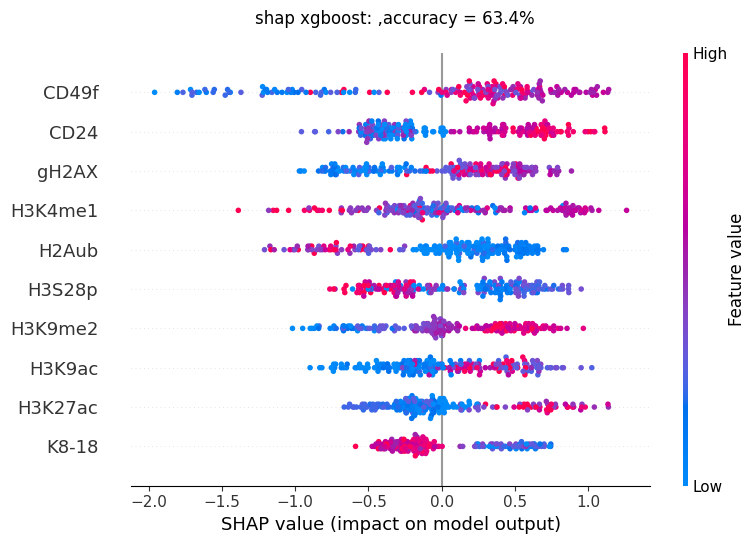

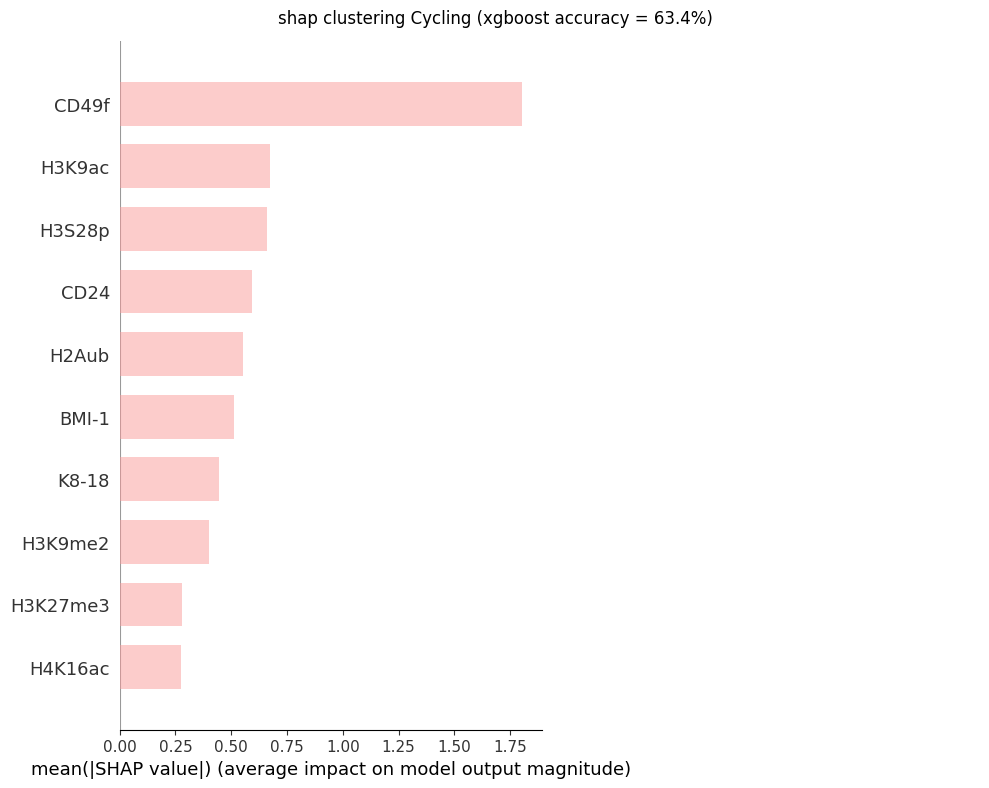

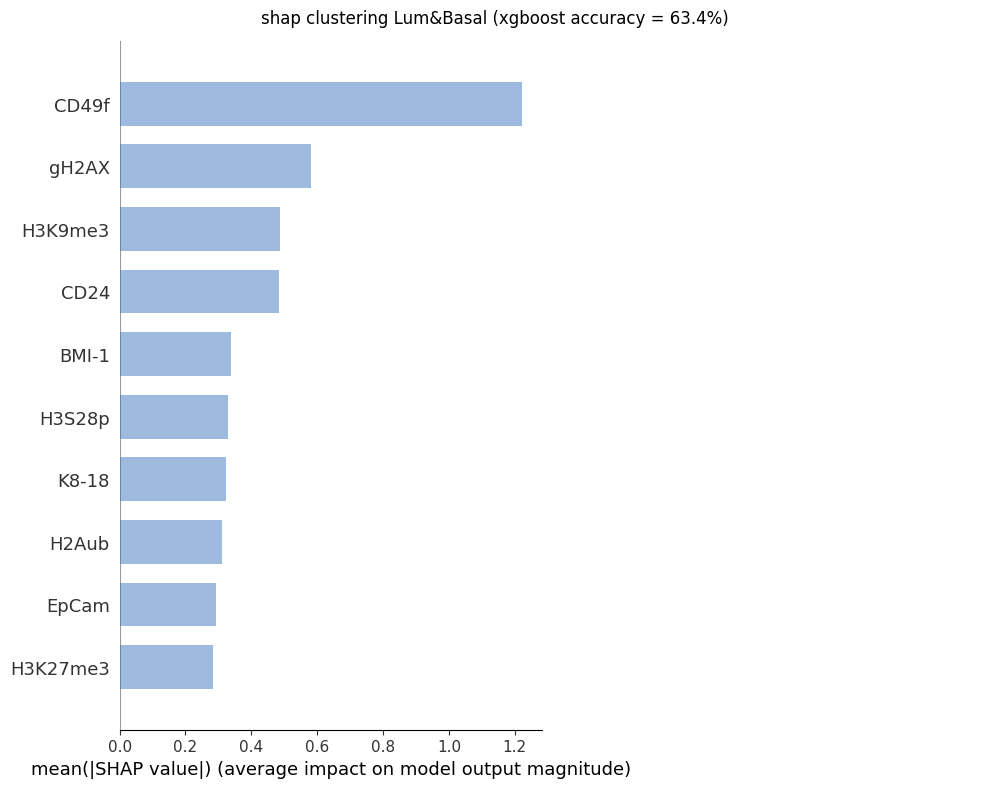

classes accuracy b2345a_reduced_2: 63.4%


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


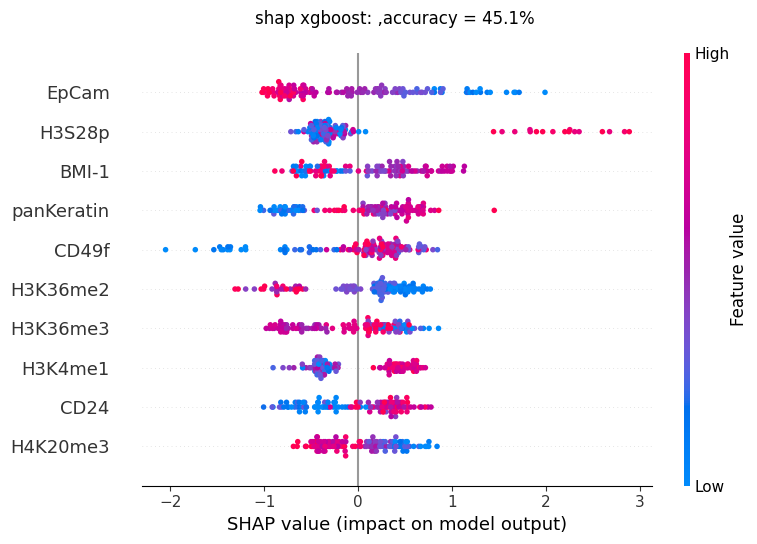

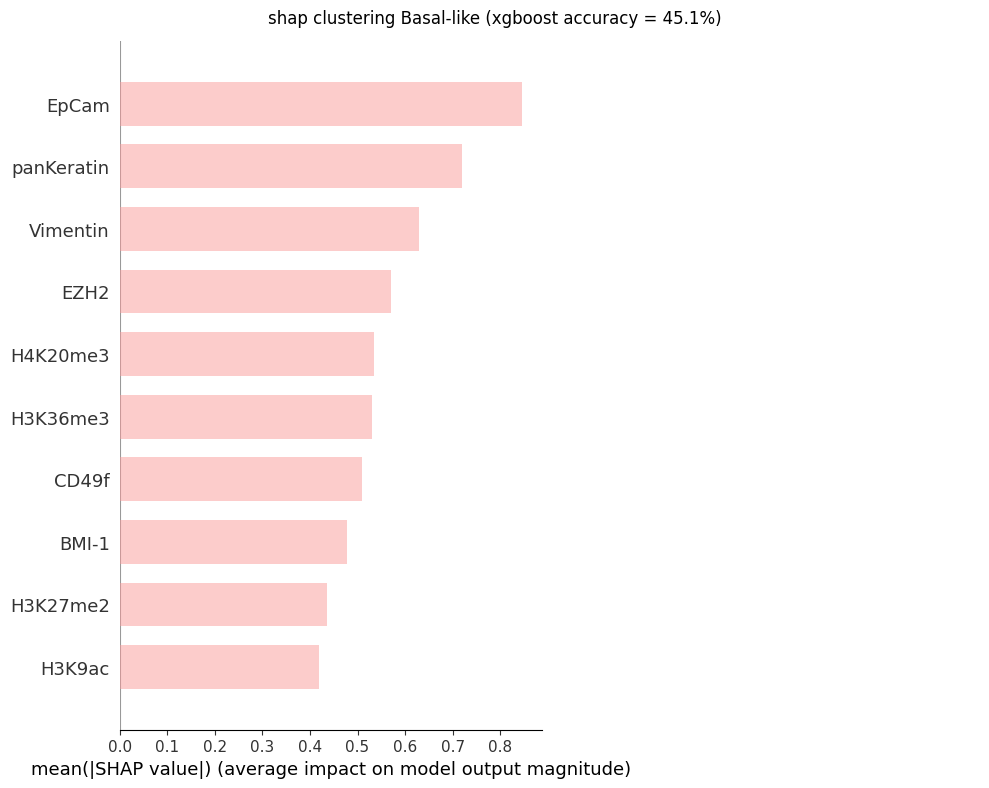

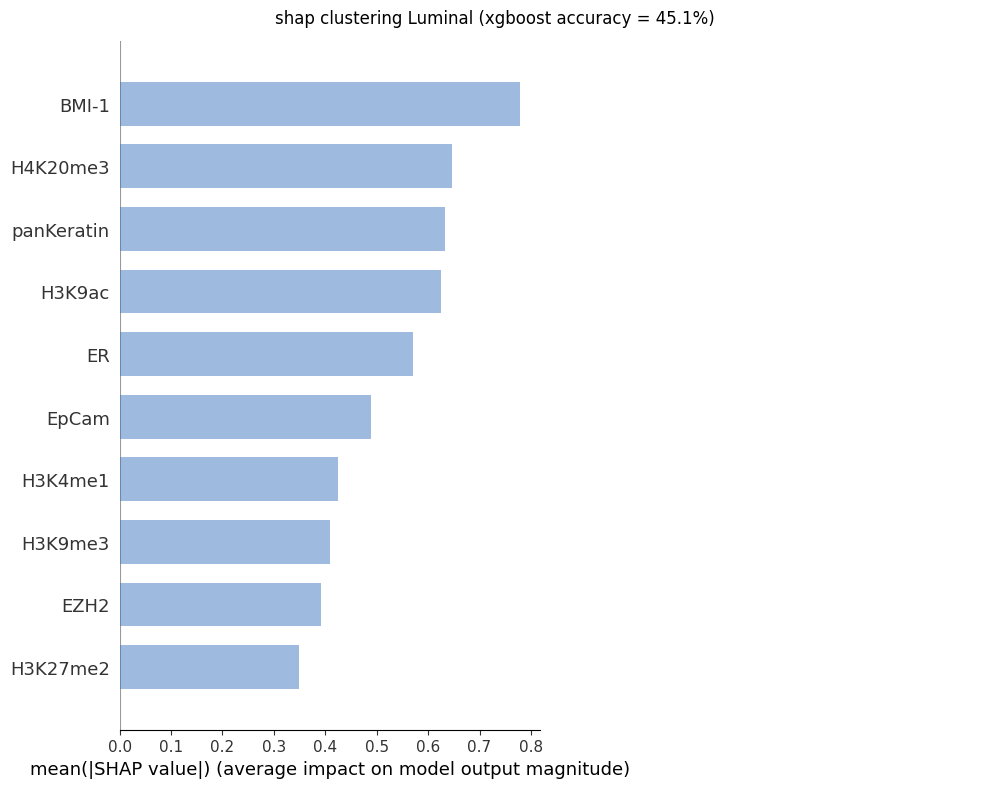

classes accuracy b2345a_reduced_2: 45.1%


In [10]:
if not use_MASTER:

    # from xg_shap import *


    accuracy = xg_classification_shap(df[config['features']].copy(),classes1.copy(), 
                                config = config, colors = class_colors(),
                                figname='5_'+config['figname']+'shap_classes_Cycling_vs_Lum&Basal'
    print(f"classes accuracy {config['j']}_{config['feautures_ind']}: {accuracy}%")
    
    accuracy = xg_classification_shap(df[config['features']].copy(),classes2, 
                                config = config, colors = class_colors(),
                                figname='5_'+config['figname']+'shap_Basal_vs_Luminal'
    print(f"classes accuracy {config['j']}_{config['feautures_ind']}: {accuracy}%")
    
    del classes2,classes1
